# Решение обратной задачи электростатики $\Phi(r_{\phi}) =\sum_{q} \dfrac{q(r_q)}{|r_{\phi}-r_{q}|}$ для молекулы хромофора внутри какого-то бочкообразного белка в 2D-варианте

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import norm

# Создание сетки зарядов

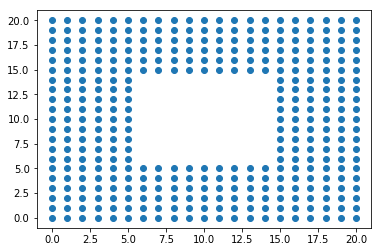

In [2]:
grid = []
for i in range(21):
    for j in range(21):
        if not (5 < i < 15 and 5 < j < 15):
            grid.append((i, j))
            
grid = np.array(grid)
plt.scatter(grid[:, 0], grid[:, 1])

# Создание линейной сетки для потенциала на хромофоре

titration_curve $-$ кривая титрования по формуле $f(V) = \log(\beta) - \dfrac{b}{\ln(10)}\sinh^{-1} \left(c\dfrac{d - V}{e + gV} \right)$

In [ ]:
# Изменение параметров кривой титрования происходит здесь
beta = 10
b = 5
c = 700
d = 20
e = 20
g = 1

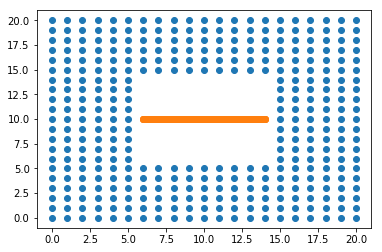

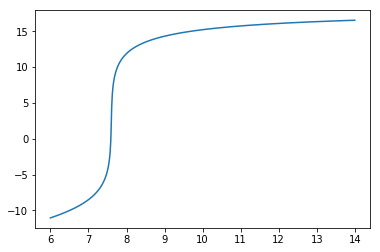

In [3]:
from math import log, asinh

def titration_curve(v):
    return log(beta) - b / log(10) * asinh(c * (d - v) / (e + g * v))

N_TARGET = 1000
chromo = []
values = []

for x in np.linspace(6, 14, N_TARGET):
    chromo.append((x, 10))
    values.append(titration_curve(10 + 50 * (x - 6) / (14 - 6)))
chromo = np.array(chromo)
values = np.array(values)

plt.scatter(grid[:, 0], grid[:, 1])
plt.scatter(chromo[:, 0], chromo[:, 1])
plt.show()
plt.plot(chromo[:, 0], values)

# Вычисление функции Грина на сетке $\dfrac{1}{|r_{\phi_i}-r_{q_j}|}$

In [4]:
x_diffs = np.subtract.outer(chromo[:, 0], grid[:, 0])
y_diffs = np.subtract.outer(chromo[:, 1], grid[:, 1])
dists = 1 / np.sqrt(x_diffs**2 + y_diffs**2)

# Поиск зарядов, минимизирующих квадратичное отклонение 

In [7]:
q = np.linalg.lstsq(dists, values, rcond=None)[0]

# Отображение полученного потенциала
Сначала создается тестовая решетка большей зернитости на хромофоре. В ней отображается потенциал полученных зарядов.

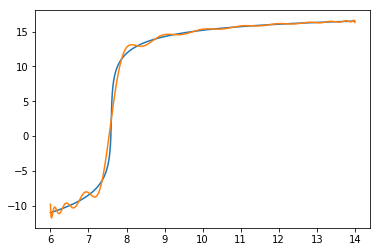

In [8]:
N_TARGET = 10000
chromo_test = []
values_test = []
for x in np.linspace(6, 14, N_TARGET):
    chromo_test.append((x, 10))
    values_test.append(titration_curve(10 + 50 * (x - 6) / (14 - 6)))
chromo_test = np.array(chromo_test)
values_test = np.array(values_test)

x_diffs = np.subtract.outer(chromo_test[:, 0], grid[:, 0])
y_diffs = np.subtract.outer(chromo_test[:, 1], grid[:, 1])
dists = 1 / np.sqrt(x_diffs**2 + y_diffs**2)

pred_values = dists.dot(q)
plt.plot(chromo_test[:, 0], values_test)
plt.plot(chromo_test[:, 0], pred_values)